# Practical Lab 1: Univariate Linear Regression on the California Housing Dataset

The goal of this analysis is to evaluate the relationship between the median house value and three independent variables (median income, population, and number of households). We will:
- Perform exploratory data analysis (EDA).
- Fit three univariate linear regression models.
- Evaluate the performance of these models using metrics.
- Recommend the best model based on its fit.


In [2]:
import pandas as pd

data = pd.read_csv(r"C:\Users\sruth\OneDrive\Documents\housing.csv")  
data.head()


C:\Users\sruth\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Summary Statistics:

In [3]:
data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Scatter Plots:

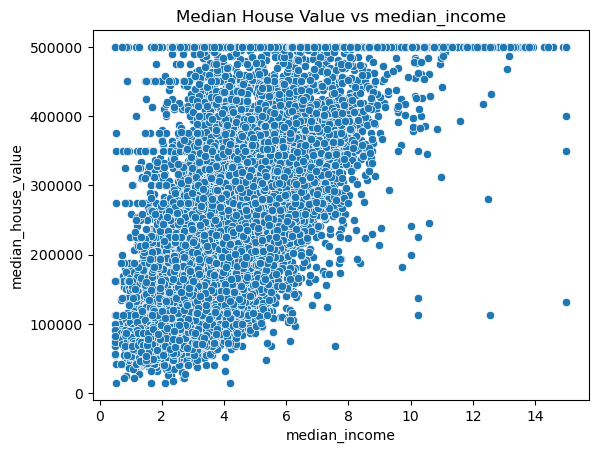

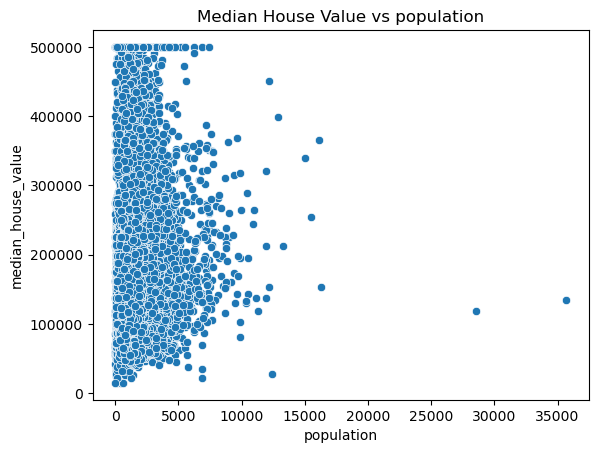

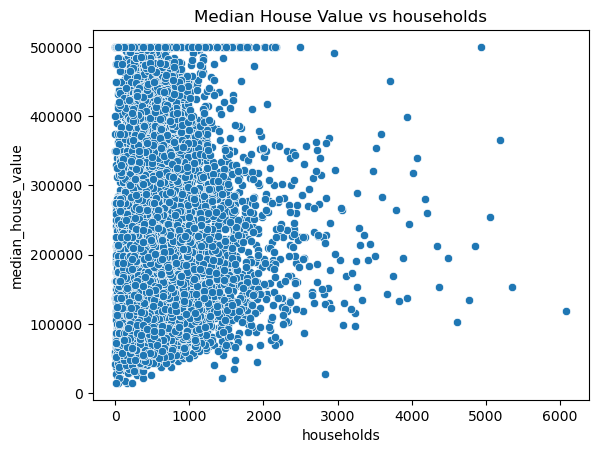

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['median_income', 'population', 'households']
for var in variables:
    sns.scatterplot(x=data[var], y=data['median_house_value'])
    plt.title(f'Median House Value vs {var}')
    plt.show()


Describe Variables:

Variable Descriptions and Observations
1. Median Income (median_income)
Meaning: Median income of households in tens of thousands of dollars.
Range: 0.499 to 15.0.
Observations: Strong positive linear relationship with median_house_value. Higher incomes correlate with higher house values. Few outliers exist, and house prices appear capped at $500,000.
2. Population (population)
Meaning: Total population in a California block group.
Range: 3 to 35,682.
Observations: Weak correlation with median_house_value. High population densities do not necessarily lead to higher house values. Outliers observed in densely populated areas.
3. Number of Households (households)
Meaning: Total number of households in a California block group.
Range: 1 to 6,082.
Observations: Weak positive correlation with median_house_value. Larger household numbers might represent urban or multi-family residential areas. Some outliers are present.
4. Median House Value (median_house_value)
Meaning: Median house value in dollars.
Range: $14,999 to $500,001 (capped).
Observations: Dependent variable. Capped values at $500,000 may bias regression results, especially for high-income groups.

Step 5: Fitting Linear Regression Models

Train the Models:

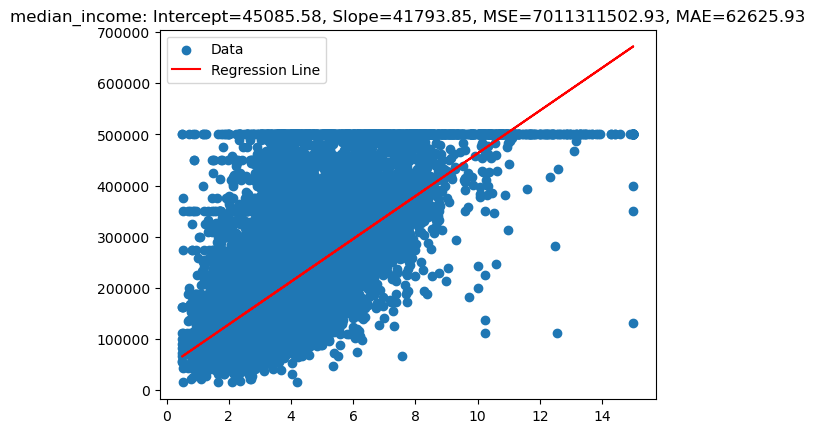

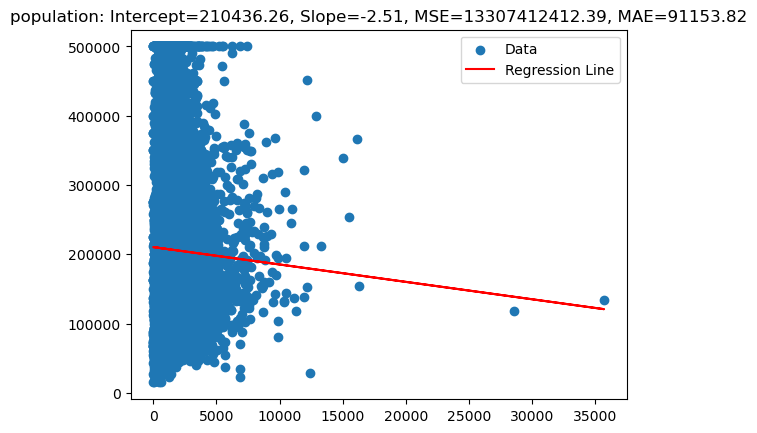

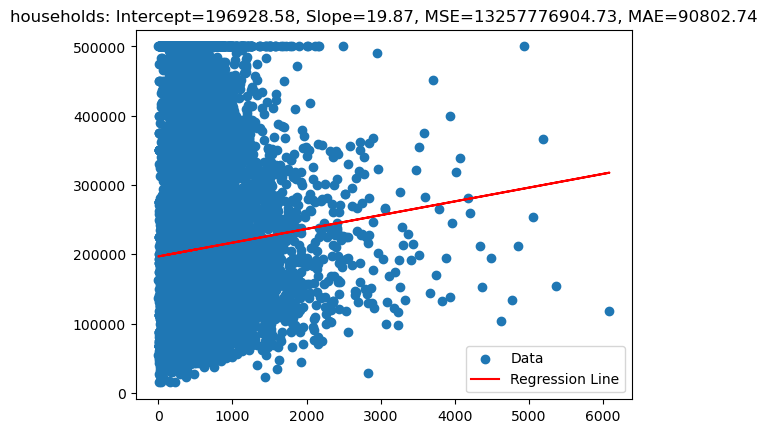

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

models = {}
for var in variables:
    X = data[[var]].values
    y = data['median_house_value'].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    intercept, slope = model.intercept_, model.coef_[0]
    predictions = model.predict(X)
    
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    
    models[var] = {'Intercept': intercept, 'Slope': slope, 'MSE': mse, 'MAE': mae}
    
    # Plot
    plt.scatter(X, y, label='Data')
    plt.plot(X, predictions, color='red', label='Regression Line')
    plt.title(f'{var}: Intercept={intercept:.2f}, Slope={slope:.2f}, MSE={mse:.2f}, MAE={mae:.2f}')
    plt.legend()
    plt.show()


Summarize Results:

In [6]:
results = pd.DataFrame(models).T
results


,Intercept,Slope,MSE,MAE
median_income,45085.576703,41793.849202,7.011312e+09,62625.933791
population,210436.262076,-2.511753,1.330741e+10,91153.820095
households,196928.577162,19.872775,1.325778e+10,90802.743243


Summary and Conclusion

The median_income model demonstrates the best performance with the lowest Mean Squared Error (MSE: 7.01×1097.01×10 9 ) and Mean Absolute Error (MAE: 62,625.93). It shows a strong positive relationship with median_house_value, making it the most reliable predictor.
In contrast, both the population and households models exhibit weak predictive power, with significantly higher error metrics (MSE: 1.33×10
101.33×10 10  and 1.32×10101.32×10 10 , respectively) and no clear linear trends. The population model, in particular, shows a slightly negative relationship, further reducing its utility.

Overall, median_income is recommended as the key variable for predicting median_house_value. Further improvements could be achieved by addressing the capped house prices at $500,000 and exploring multivariate models for more comprehensive insights.